# Insurance Claims- Fraud Detection

### Import Libraries

In [1]:
# Data processing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df=pd.read_csv('../Datasets/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Dataset is having numeric and categorical columns. Dataset contains symbol '?' and NaN values as well.

### Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In the dataset, we have the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. Here, we will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

The target variable in the data set is 'fraud_reported' that will be represented by binary classes and hence it is a classification problem.

In [3]:
#Checking the dataset shape
df.shape

(1000, 40)

Dataset is having 1000 rows and 40 columns (39 input features and 1 output feature).

In [4]:
# Checking columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Columns names are displayed where 'fraud_reported' is the target variable and all other are independent variables.

In [5]:
# Checking datatypes
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Here, we can see columns are of type object and integer i.e. both categorical and numeric columns are there.

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

It gives additional information regarding the dataset like RangeIndex, Data columns, datatypes. We can see there are null values in the dataset.

### Data Preprocessing

In [7]:
# Checking which all column values are relevant for model training
for i in df.columns :
    print(i)
    print('Unique values : ',df[i].nunique())
    print('Value counts  : ',df[i].value_counts())
    print('----------------------')

months_as_customer
Unique values :  391
Value counts  :  194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
----------------------
age
Unique values :  46
Value counts  :  43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64
----------------------
policy_number
Unique values :  1000
Value counts  :  296960    1
206213    1
853360    1
521585    1
290162    1
         ..
276804    1
426708    1
963285    1
789208    1
116735    1
Name: policy_number, Length: 1000, dtype: int64
----------------------
policy_bind

Value counts  :  0    340
2    332
1    328
Name: bodily_injuries, dtype: int64
----------------------
witnesses
Unique values :  4
Value counts  :  1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64
----------------------
police_report_available
Unique values :  3
Value counts  :  NO     343
?      343
YES    314
Name: police_report_available, dtype: int64
----------------------
total_claim_amount
Unique values :  763
Value counts  :  59400    5
2640     4
75400    4
60600    4
5940     4
        ..
51590    1
31700    1
53640    1
63100    1
88920    1
Name: total_claim_amount, Length: 763, dtype: int64
----------------------
injury_claim
Unique values :  638
Value counts  :  0        25
640       7
480       7
1180      5
860       5
         ..
10800     1
12580     1
6700      1
4650      1
16500     1
Name: injury_claim, Length: 638, dtype: int64
----------------------
property_claim
Unique values :  626
Value counts  :  0        19
860       6
640       5
480     

Column 'policy_number','incident_location' has 1000 unique values that is equal to total rows. '_c39' has 0 unique values i.e. all null. Hence we can drop these columns. 

'policy_bind_date','policy_annual_premium','insured_zip' has 951,991,995 unique values i.e. very close to the total records.

Columns 'collision_type','property_damage','police_report_available' has 178,360,343 records respectively with value as '?', we need to treat this as null. 

Target column 'fraud_reported' has 2 values but value counts have a huge difference hence there is class imbalance issue.

In [8]:
# Deleting unnecassary columns
df=df.drop(['policy_number','policy_bind_date','incident_date','incident_location','_c39'], axis = 1)

In [9]:
# Replacing the invalid value with null
df=df.replace('?',np.NaN)

# Checking the null values
df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim        

We have nulls in columns 'collision_type','property_damage','police_report_available'.

In [10]:
df.shape

(1000, 35)

In [11]:
# Checking invalid values in dataset
df.loc[(df['collision_type'].isna())&(df['property_damage'].isna())&(df['police_report_available'].isna())]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
51,91,27,IL,100/300,2000,1073.83,0,609930,FEMALE,JD,...,2,NaN,7260,1320,660,5280,BMW,M5,2008,N
81,244,40,OH,500/1000,2000,1267.81,5000000,603123,FEMALE,Masters,...,1,NaN,6600,660,1320,4620,Accura,TL,2005,N
127,165,32,IN,500/1000,500,1399.26,0,611586,FEMALE,High School,...,0,NaN,3960,330,660,2970,BMW,M5,1998,N
141,287,41,IL,500/1000,2000,968.74,0,477519,MALE,Masters,...,3,NaN,5170,470,940,3760,Suburu,Forrestor,2001,N
159,136,29,OH,100/300,500,1203.24,0,600702,FEMALE,JD,...,0,NaN,6200,1240,620,4340,Honda,Accord,1999,N
199,285,43,OH,100/300,2000,1512.58,0,452496,FEMALE,College,...,1,NaN,2520,280,280,1960,BMW,3 Series,1997,N
211,210,37,IN,500/1000,2000,1048.46,0,466676,MALE,High School,...,2,NaN,7080,1180,590,5310,Dodge,RAM,1999,N
297,247,39,IL,100/300,500,806.31,0,602177,FEMALE,College,...,3,NaN,3300,600,0,2700,Dodge,RAM,2003,N
333,101,26,IL,500/1000,1000,1371.88,0,462420,FEMALE,MD,...,2,NaN,3190,580,580,2030,Suburu,Legacy,1995,N


We can see in 22 rows all the 3 columns 'collision_type','property_damage','police_report_available' have invalid value i.e.'?'

In [12]:
# Treating the null values
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)

In [13]:
# Checking shape of new dataset
df.shape

(1000, 35)

In [14]:
# Checking for the duplicates in the dataset
df[df.duplicated()].count()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

There are no duplicate values in the dataset.

### EDA and Visualizations

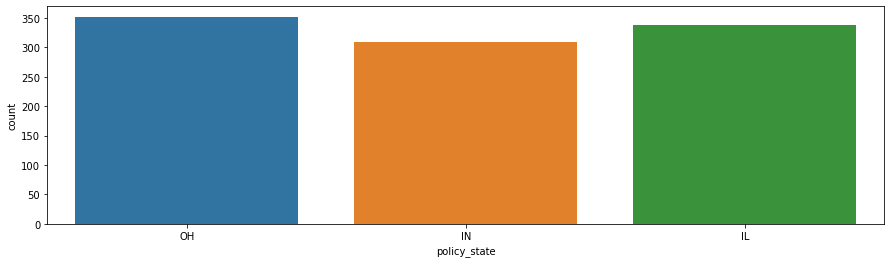

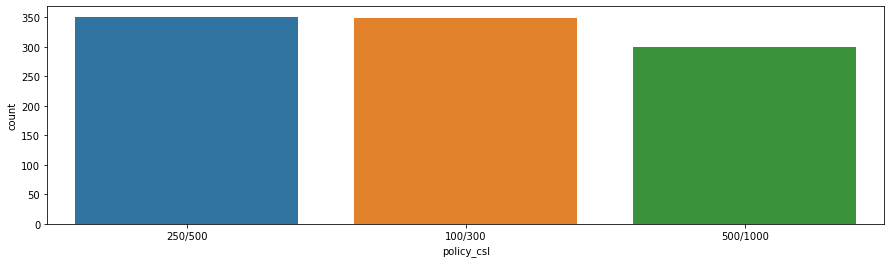

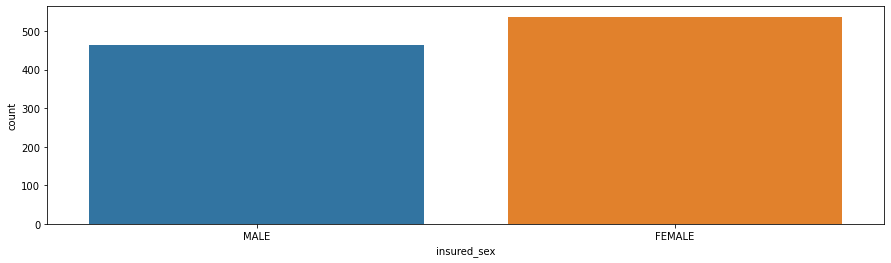

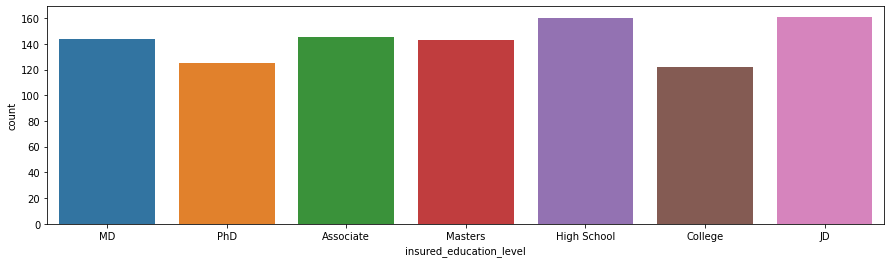

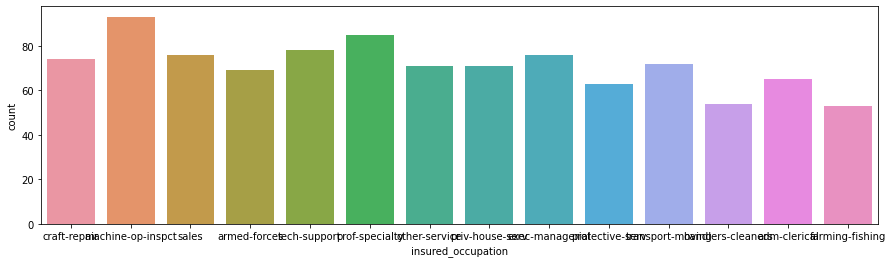

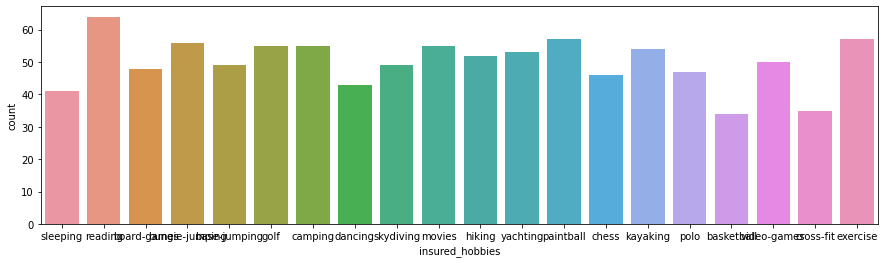

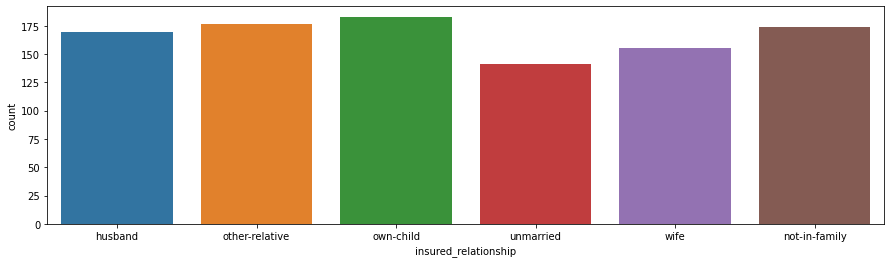

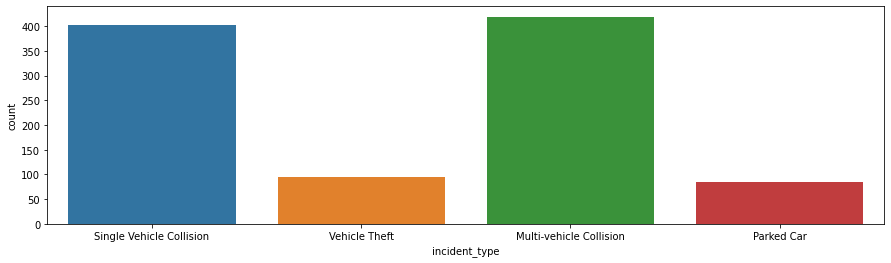

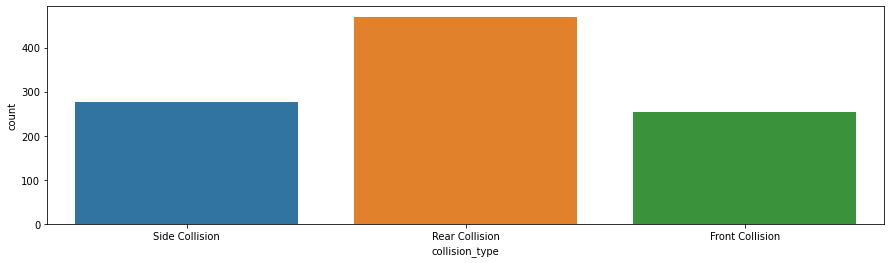

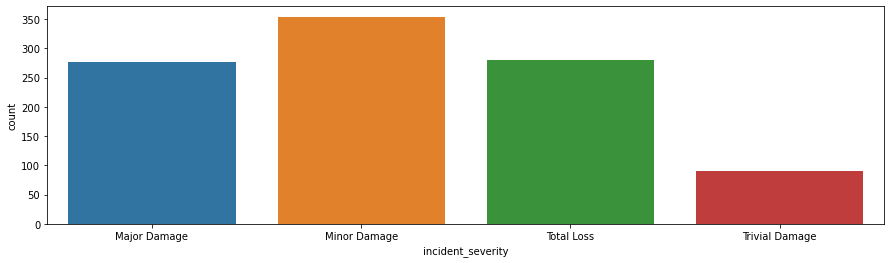

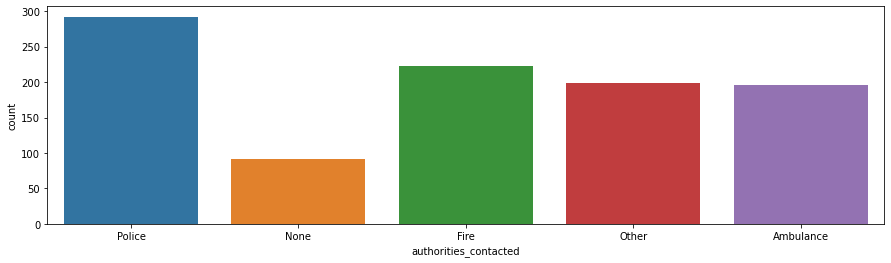

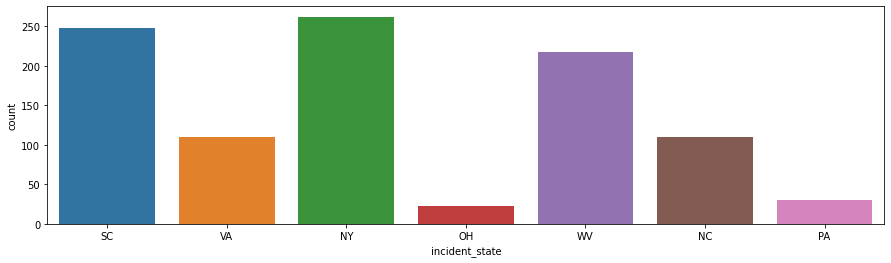

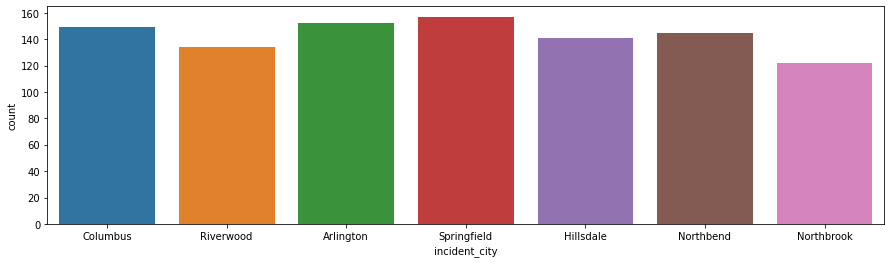

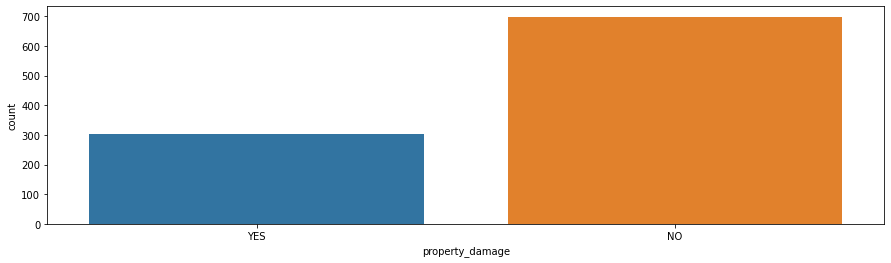

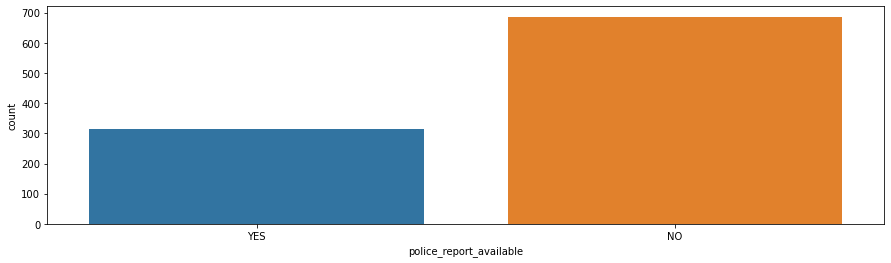

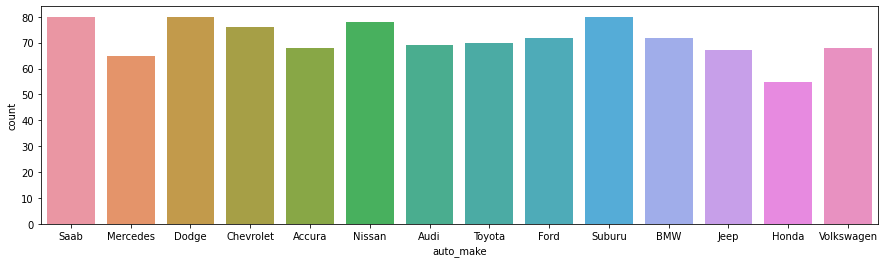

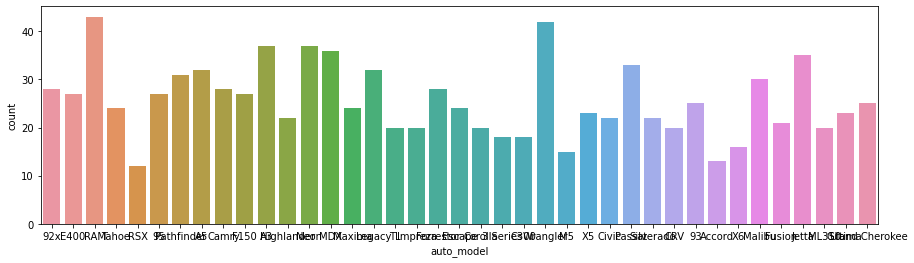

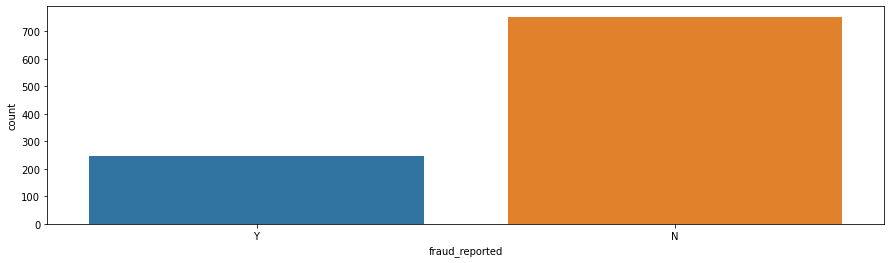

In [15]:
# Visualizing value counts for object type the columns
for i in df.columns :
    if df[i].dtypes=='object' :
        plt.figure(figsize=(15,4))
        sns.countplot(df[i])
        plt.show()

With the countplot we can see that 'policy_state' OH has the highest number of insurance claimed. 'policy_csl' 250/500 has highest number of claims followed by 100/300. Females are in majority in insured_sex. 'insured_education_level' JD is highest in number followed by High School. 'insured_occupation' machine-op-inspct is in majority nd least is farming-fishing. 'insured_hobbies' are reading majorly and least is basketball. 'insured_relationship' as own-child is in majority. 'incident_type' has most of the records for Multi-vehicle Collision and least for Parked Car. 'collision_type' is mostly rear collision. 'incident_severity' is highly Minor Damage and least as Trivial Damage. Police is at first for authorities_contacted and least have contacted None. Most incidents happen in NY followed by SC 'incident_state'. 'incident_city' Springfield is leading amongst all. 'property damage' doesn't take place in most of the incidents and police report is not available for high number of incidents. 'auto_model' RAM is leading in claims/incidents followed by Wrangler and last is RSX in the list.

'fraud_reported' as N has a huge count than Y and since this is a target variable this columns needs class balancing.

<AxesSubplot:>

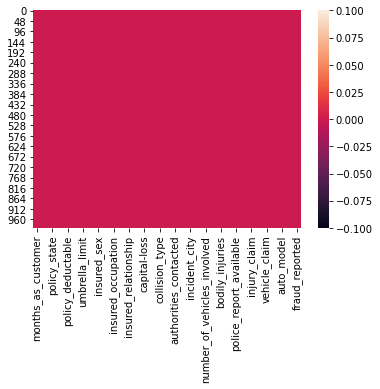

In [16]:
# Visualizing nulls
sns.heatmap(df.isnull())

Heatmap showing 0 null values in the dataset.

In [17]:
# Describe dataset
df.describe()
#df.describe(include='all')

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


months_as_customer ranges from 0 to 479, age ranges from 19 to 64, policy_deductable ranges from 500 to 2000, policy_annual_premium ranges from 433 to 2048, insured_zip ranges from 430104 to 620962, capital-gains ranges from 0 to 100500, capital-loss ranges from -111100 to 0, incident_hour_of_the_day 0 to 23, number_of_vehicles_involved ranges from 1-4, bodily_injuries ranges from 0-2, witnesses ranges from 0-3, total_claim_amount ranges from 100 to 114920, injury_claim ranges from 0 to 21450, property_claim ranges from 0 to 23670, vehicle_claim ranges from 70 to 79560, auto_year ranges from 1995 to 2015.

months_as_customer,policy_deductable,insured_zip,capital-gains,capital-loss,injury_claim,property_claim, have mean>median hence right skewness is there and the difference between 75% and max values are not much hence outliers might not be there. Columns incident_hour_of_the_day,witnesses,total_claim_amount,vehicle_claim have left skewness.

Standard deviation seem high for months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim.

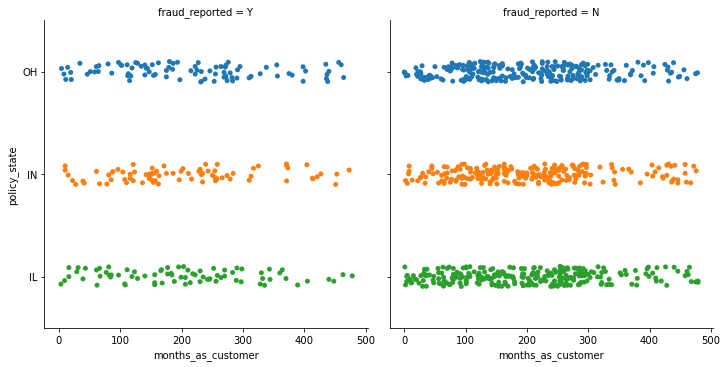

In [18]:
# Category plot for categorical data
sns.catplot(x='months_as_customer',y='policy_state',data=df, col='fraud_reported')

Fraud reported is less than the fraud not reported in all the 3 policy_state. Frauds reported & not reported are high for less than 300 months_as_customer.

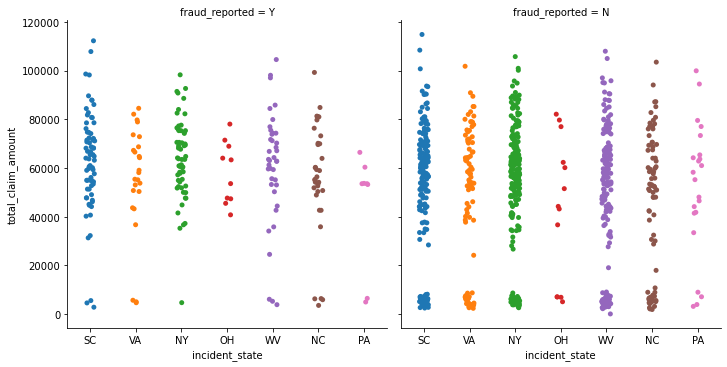

In [19]:
sns.catplot(x='incident_state',y='total_claim_amount',data=df, col='fraud_reported')

Frauds not reported have high total_claim_amount in incident_state WV,SC followed by NY and least in OH as compared to the frauds reported.

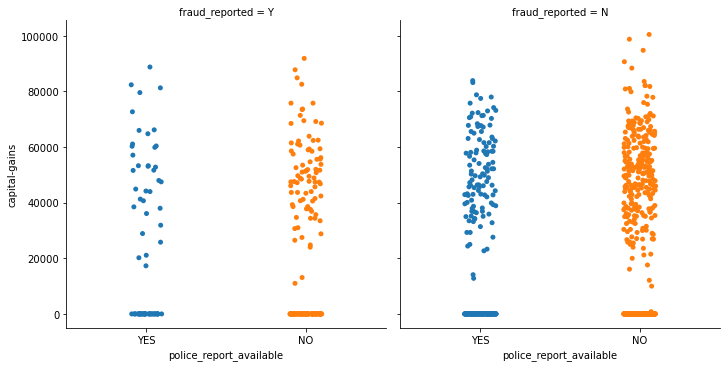

In [20]:
sns.catplot(x='police_report_available',y='capital-gains',col='fraud_reported',data=df)

Majority of police reports are not available for both frauds reported and not reported. Capital gain if highest for fraud not reported and police report not available.

In [21]:
# Pivot table showing counts
pd.crosstab(df['fraud_reported'],df['auto_model'])

auto_model,3 Series,92x,93,95,A3,A5,Accord,C300,CRV,Camry,...,Pathfinder,RAM,RSX,Silverado,TL,Tahoe,Ultima,Wrangler,X5,X6
fraud_reported,,,,,,,,,,,,,,,,,,,,,
N,17,20,20,22,27,21,10,11,17,24,...,27,29,11,13,16,15,20,37,16,9
Y,1,8,5,5,10,11,3,7,3,4,...,4,14,1,9,4,9,3,5,7,7


For most of the auto_models, high number of frauds are not reported and only few are reported.

In [22]:
pd.crosstab(df['witnesses'],df['fraud_reported'])

fraud_reported,N,Y
witnesses,,
0,199,50
1,195,63
2,176,74
3,183,60


Fraud not reported with 0 witnesses has highest count and in fraud reported, 2 as witnesses have high count.

In [23]:
pd.crosstab(df['insured_sex'],df['policy_deductable'])

policy_deductable,500,1000,2000
insured_sex,,,
FEMALE,180,191,166
MALE,162,160,141


Females are in majority for all categories of policy_deductable as compared to men.

In [24]:
pd.crosstab(df['fraud_reported'],df['authorities_contacted'])

authorities_contacted,Ambulance,Fire,None,Other,Police
fraud_reported,,,,,
N,139,163,85,135,231
Y,57,60,6,63,61


Police is highly contacted for not fraud reported and authorities_contacted None has highest count for fraud reported.

<AxesSubplot:xlabel='insured_education_level', ylabel='policy_annual_premium'>

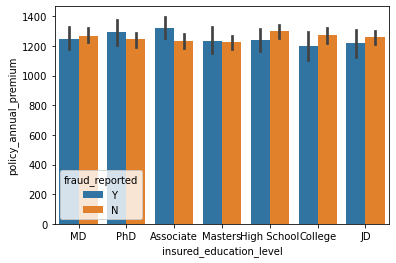

In [25]:
sns.barplot(x='insured_education_level',y='policy_annual_premium',data=df, hue='fraud_reported')

policy_annual_premium is highest for Associate_insured and fraud is reported. For fraud not reported highest policy_annual_premium is for insured_education_level School.

<AxesSubplot:xlabel='insured_relationship', ylabel='injury_claim'>

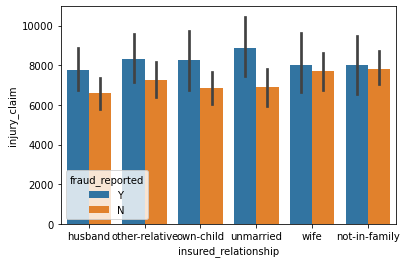

In [26]:
sns.barplot(x='insured_relationship',y='injury_claim',data=df, hue='fraud_reported')

injury_claim is high for fraud_reported for all the insured relationships but highest is for unmarried.

<AxesSubplot:xlabel='property_damage', ylabel='total_claim_amount'>

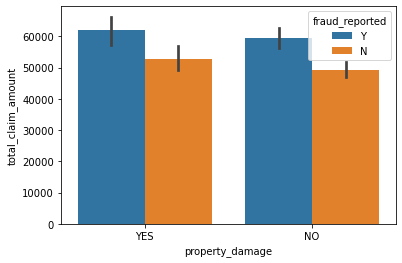

In [27]:
sns.barplot(x='property_damage',y='total_claim_amount',data=df, hue='fraud_reported')

property damaged or not, total_claim_amount is high for fraud reported but highest in property damaged and fraud reported. Where no fraud reported property damage is comparatively less.

<AxesSubplot:xlabel='incident_type', ylabel='umbrella_limit'>

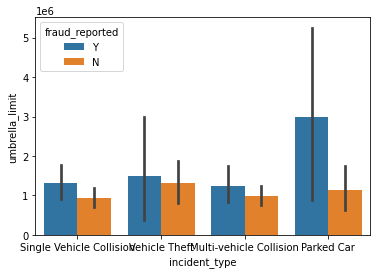

In [28]:
sns.barplot(x='incident_type',y='umbrella_limit',data=df, hue='fraud_reported')

umbrella_limit is highest for the Parked car that is fraud reported and least for single vehicle collision where fraud not reported.

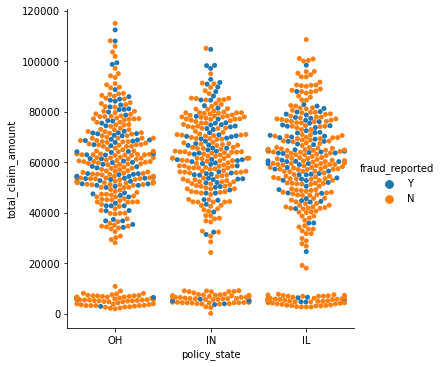

In [29]:
sns.catplot(x='policy_state',y='total_claim_amount', data=df, kind='swarm',hue='fraud_reported')

Few frauds reported in all the 3 states with total_claim_amount below 20000. total_claim_amount highly lie in the range of 50000-80000.

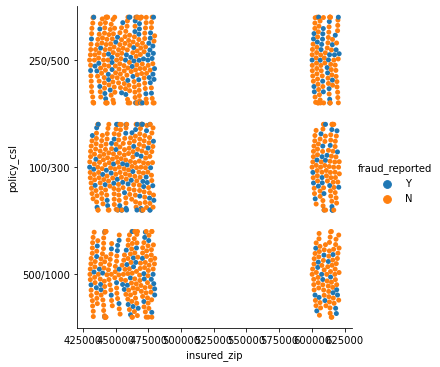

In [30]:
sns.catplot(x='insured_zip',y='policy_csl', data=df, kind='swarm',hue='fraud_reported')

Least reports are from policy_csl 500/1000 w.r.t. insured_zip.

<AxesSubplot:xlabel='policy_deductable', ylabel='injury_claim'>

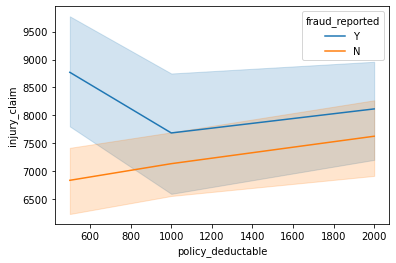

In [31]:
sns.lineplot(x='policy_deductable',y='injury_claim',data=df,hue='fraud_reported')

Injury_claim increases with the increase in policy_deductable for fraud not reorted whereas for fraud reported is yes, with increase in policy_deductable injury_claim firt decreases to aprox 7700 and then increases gradually.

In [32]:
# Dividing the data in categorical and numeric columns
# Categorical data
df_cat=df.select_dtypes(include='object')
df_cat

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,NO,NO,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NO,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,YES,NO,Honda,Accord,N
996,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,YES,NO,Volkswagen,Passat,N
997,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,NO,YES,Suburu,Impreza,N
998,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,NO,YES,Audi,A5,N


In [33]:
# Continuous data
df_con=df.select_dtypes(exclude='object')
df_con

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


In [34]:
# Checking outliers
from scipy.stats import zscore

z=np.abs(zscore(df_con))
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 4,  4,  4,  4,  4,  3,  3,  4,  4,  4,  4, 14,  4,  4,  4,  3,  7,
         4,  4,  4], dtype=int64))

In [35]:
# Checking the outlier in the dataset
z[88][4]

3.4399450541618797

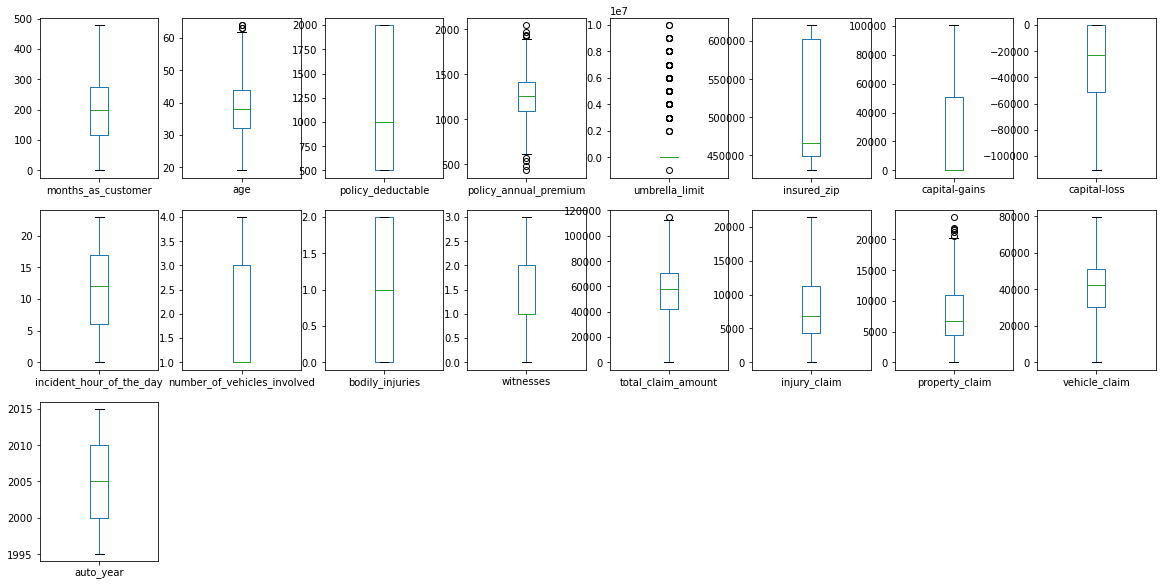

In [36]:
# Visualising outliers
df_con.plot(kind='box',subplots=True,layout=(3,8), figsize=(20,10))
plt.show()

Plot showing there are presence of outliers in the columns.

In [37]:
# Checking skewness
df_con.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

Skewness is present in the dataset as acceptable range is +/-5.

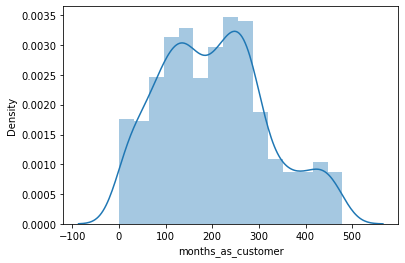

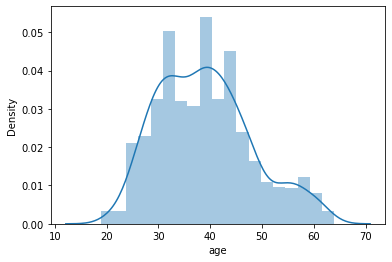

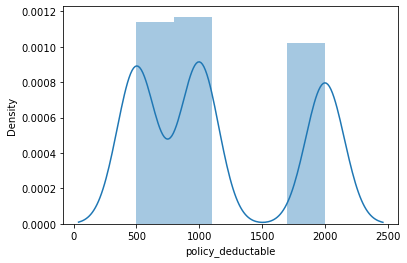

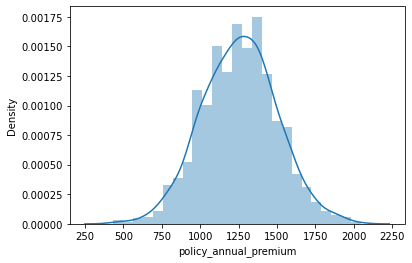

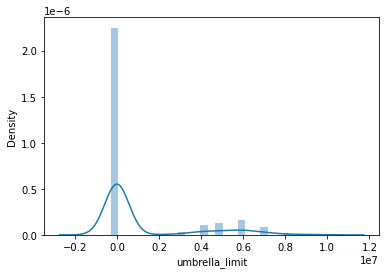

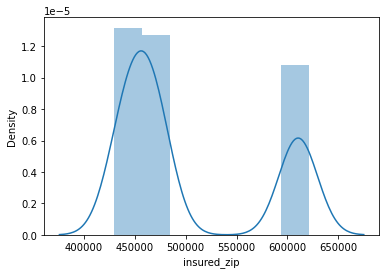

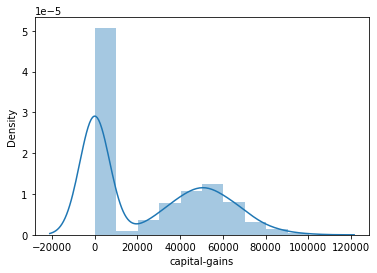

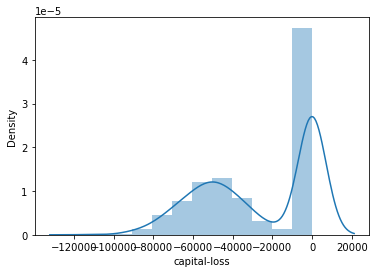

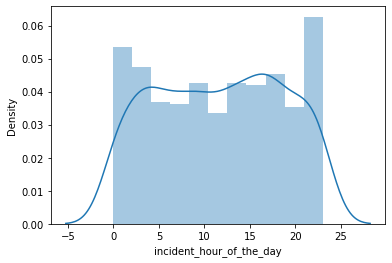

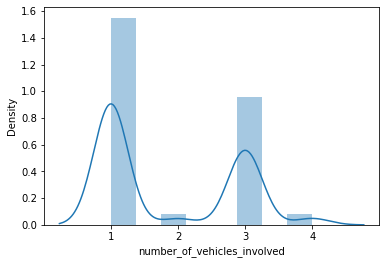

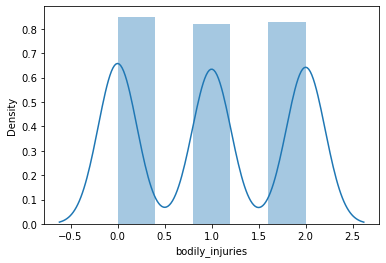

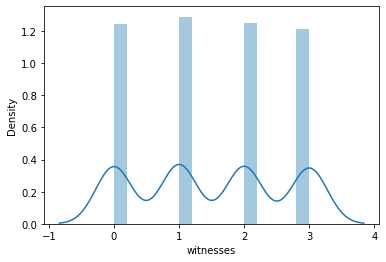

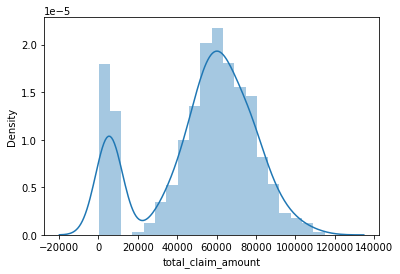

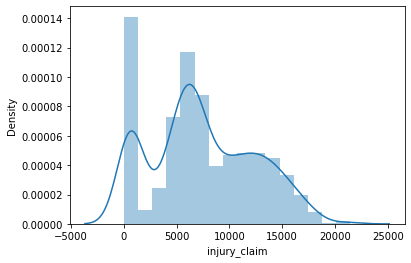

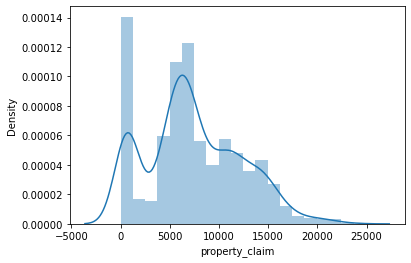

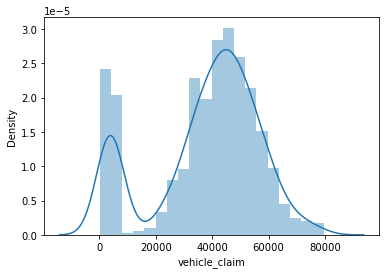

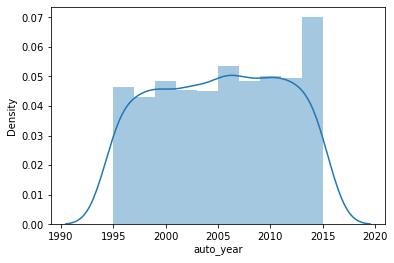

In [38]:
# Visualizing skewness
for i in df_con.columns :
    sns.distplot(df_con[i])
    plt.show()

Data is skewed in columns : Fnlwgt,Education_num,Capital_gain,Capital_loss

### Data Cleaning

In [39]:
# Removing outliers

df1=df_con.copy()
df1=df_con[(z<3).all(axis=1)]
df1

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


In [40]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df_con.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (1000, 17)
Shape of dataset after removing outliers :  (980, 17)


In [41]:
# Percentage Data lost
data_percent=(1000-980)/1000*100
data_percent

2.0

Approx 2% data is lost after removing the outliers.

In [42]:
# Checking skewness after removing outliers
df1.skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
auto_year                     -0.054522
dtype: float64

We can see now skewness is present in the columns : umbrella_limit,insured_zip,vehicle_claim.

In [42]:
# Removing skewness
df2=df1.copy()
for i in df2.columns :
    if (df[i].skew()>0.5):
        df2[i]=np.log1p(df1[i]+1)
print(df2.skew())

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.584400
insured_zip                    0.802553
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.444300
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
auto_year                     -0.054522
dtype: float64


Skewness is still there in columns : umbrella_limit,insured_zip,vehicle_claim.

In [43]:
# Again removing skewness
df2['umbrella_limit']=np.log(df1['umbrella_limit']+1)
df2['insured_zip']=np.log(df1['insured_zip']+1)
#df2['vehicle_claim']=np.log1p(df1['vehicle_claim']+1)
df2.skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.584272
insured_zip                    0.802553
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.444300
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
auto_year                     -0.054522
dtype: float64

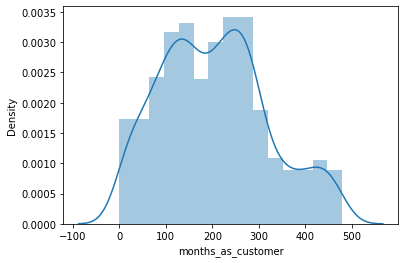

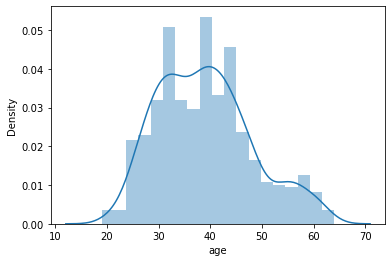

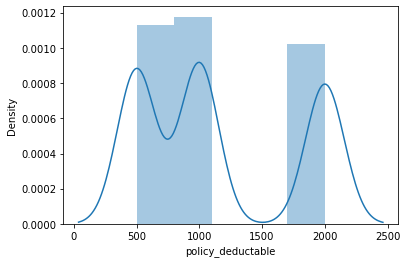

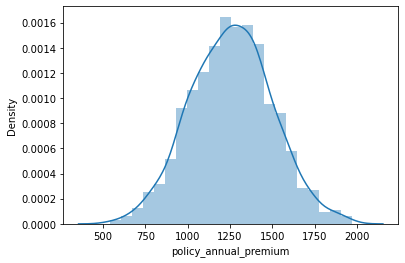

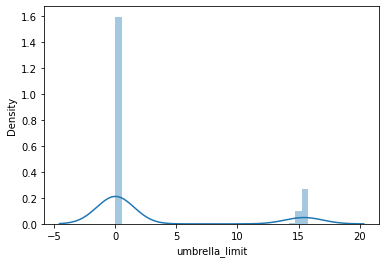

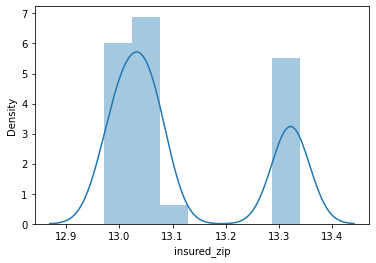

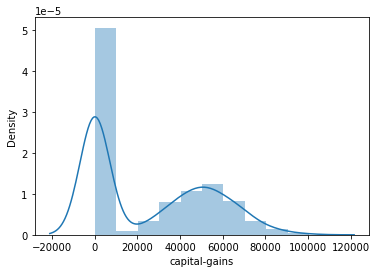

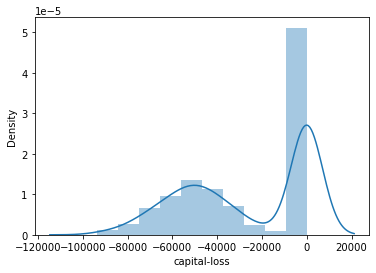

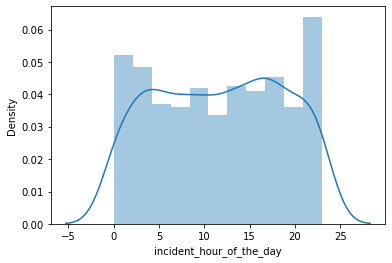

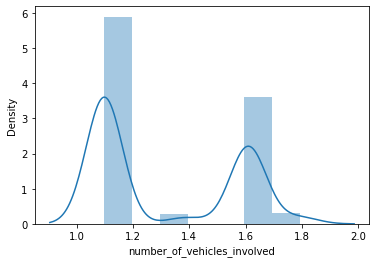

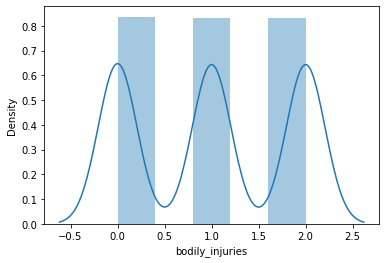

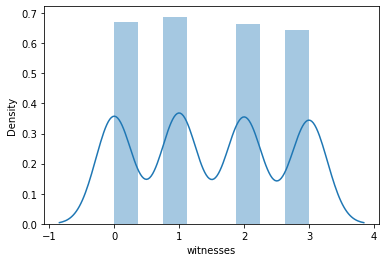

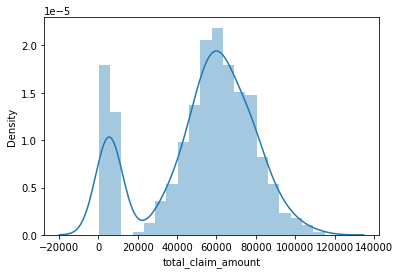

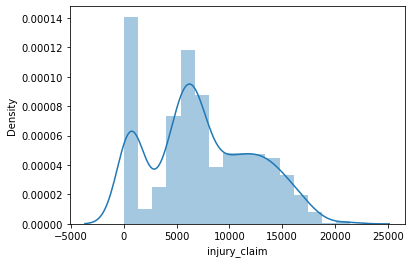

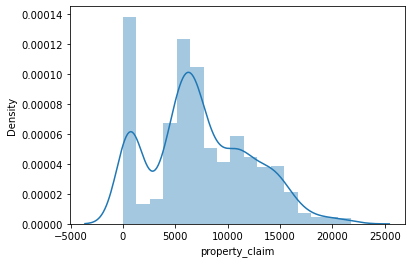

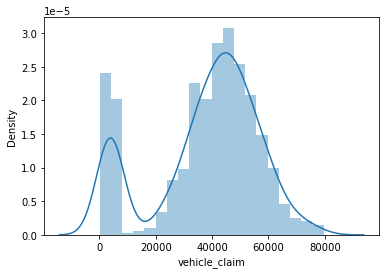

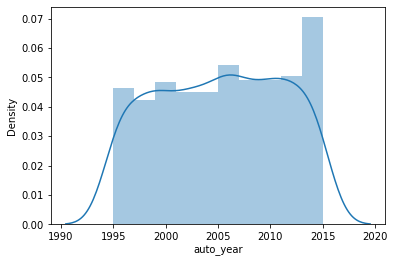

In [44]:
# Visualizng skewness
for i in df2.columns :
    sns.distplot(df2[i])
    plt.show()

Removed skewness from all columns but in column 'vehicle_claim' skewness is increasing on further applying any transformations and in 'umbrella_limit','insured_zip' no significant change is seen on further removing skewness due to the kind of data distribution. Hence we can consider the present values as skewness threshold.

In [45]:
# Checking the new dataset
df2

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0.000000,13.052226,53300,0,5,1.098612,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,15.424949,13.056602,0,0,8,1.098612,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,15.424949,12.973011,35100,0,7,1.609438,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,15.607270,13.318124,48900,-62400,5,1.098612,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,15.607270,13.322373,66000,-46000,20,1.098612,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0.000000,12.974536,0,0,20,1.098612,0,1,87200,17440,8720,61040,2006
996,285,41,1000,1436.79,0.000000,13.318223,70900,0,23,1.098612,2,3,108480,18080,18080,72320,2015
997,130,34,500,1383.49,14.914123,13.000869,35100,0,4,1.609438,2,3,67500,7500,7500,52500,1996
998,458,62,2000,1356.92,15.424949,12.998420,0,0,2,1.098612,0,1,46980,5220,5220,36540,1998


### Apply encoding on categorical columns

In [46]:
# Checking for the unique values
for i in df_cat.columns :
    print(i)
    print(df_cat[i].unique())

policy_state
['OH' 'IN' 'IL']
policy_csl
['250/500' '100/300' '500/1000']
insured_sex
['MALE' 'FEMALE']
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_type
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
collision_type
['Side Collision' 'Rear Collision' 'Front Collision']
incident_severity
['Major Damage' 'Minor Da

In [47]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
df_cat_enc=df_cat.copy()
le=LabelEncoder()
for i in df_cat_enc.columns :
    df_cat_enc[i]=le.fit_transform(df_cat[i])
df_cat_enc

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2,1,1,4,2,17,0,2,2,0,4,4,1,1,1,10,1,1
1,1,1,1,4,6,15,2,3,1,1,4,5,5,0,0,8,12,1
2,2,0,0,6,11,2,3,0,1,1,4,1,1,0,0,4,30,0
3,0,1,0,6,1,2,4,2,0,0,4,2,0,0,0,3,34,1
4,0,2,1,0,11,2,4,3,1,1,2,1,0,0,0,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,0,5,2,13,4,2,0,1,1,0,4,1,0,6,6,0
996,0,0,0,6,9,17,5,2,1,0,1,4,3,1,0,13,28,0
997,2,1,0,5,1,3,2,0,2,1,4,0,0,0,1,11,19,0
998,0,2,1,0,5,0,5,2,1,0,3,1,0,0,1,1,5,0


Categorical columns with object datatypes are now encoded having 31954 rows and 8 columns.

### Combining numerical and categorical data for further analysis

In [48]:
dff=pd.concat([df2,df_cat_enc],axis=1)
dff.dropna(inplace=True)
dff.isnull().sum()

months_as_customer             0
age                            0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_year                      0
policy_state                   0
policy_csl                     0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
property_d

Combined all the columns and removed nulls

In [49]:
# Checking shape of new dataset
dff.shape

(979, 35)

New dataset is having 979 rows and 35 columns.

In [50]:
# Checking dataset values
dff

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,328.0,48.0,1000.0,1406.91,0.000000,13.052226,53300.0,0.0,5.0,1.098612,...,2,0,4,4,1,1,1,10,1,1
1,228.0,42.0,2000.0,1197.22,15.424949,13.056602,0.0,0.0,8.0,1.098612,...,1,1,4,5,5,0,0,8,12,1
2,134.0,29.0,2000.0,1413.14,15.424949,12.973011,35100.0,0.0,7.0,1.609438,...,1,1,4,1,1,0,0,4,30,0
3,256.0,41.0,2000.0,1415.74,15.607270,13.318124,48900.0,-62400.0,5.0,1.098612,...,0,0,4,2,0,0,0,3,34,1
4,228.0,44.0,1000.0,1583.91,15.607270,13.322373,66000.0,-46000.0,20.0,1.098612,...,1,1,2,1,0,0,0,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,38.0,1000.0,1310.80,0.000000,12.974536,0.0,0.0,20.0,1.098612,...,0,1,1,0,4,1,0,6,6,0
996,285.0,41.0,1000.0,1436.79,0.000000,13.318223,70900.0,0.0,23.0,1.098612,...,1,0,1,4,3,1,0,13,28,0
997,130.0,34.0,500.0,1383.49,14.914123,13.000869,35100.0,0.0,4.0,1.609438,...,2,1,4,0,0,0,1,11,19,0
998,458.0,62.0,2000.0,1356.92,15.424949,12.998420,0.0,0.0,2.0,1.098612,...,1,0,3,1,0,0,1,1,5,0


All the required columns are encoded and are in numeric form.

### EDA and Visualizatons

In [51]:
# Describng the dataset
dff.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,...,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,204.532176,38.970378,1137.895812,1257.123432,2.933206,13.114302,25313.789581,-26719.713994,11.687436,1.310705,...,1.020429,1.184883,2.165475,3.246170,2.985700,0.303371,0.315628,6.573034,19.245148,0.245148
std,115.451234,9.188224,611.231003,241.677841,6.060684,0.135711,27921.431614,27953.080202,6.969871,0.255856,...,0.727485,0.939660,1.532602,2.156379,2.035925,0.459949,0.465003,4.029230,11.135490,0.430395
min,0.000000,19.000000,500.000000,538.170000,0.000000,12.971785,0.000000,-93600.000000,0.000000,1.098612,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.000000,32.000000,500.000000,1087.410000,0.000000,13.013743,0.000000,-51350.000000,6.000000,1.098612,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,10.000000,0.000000
50%,200.000000,38.000000,1000.000000,1257.040000,0.000000,13.052786,0.000000,-24100.000000,12.000000,1.098612,...,1.000000,1.000000,2.000000,4.000000,3.000000,0.000000,0.000000,7.000000,20.000000,0.000000
75%,277.500000,44.500000,2000.000000,1415.910000,0.000000,13.309728,51100.000000,0.000000,17.500000,1.609438,...,2.000000,2.000000,4.000000,5.000000,5.000000,1.000000,1.000000,10.000000,29.000000,0.000000
max,479.000000,64.000000,2000.000000,1969.630000,15.761421,13.339027,100500.000000,0.000000,23.000000,1.791759,...,2.000000,3.000000,4.000000,6.000000,6.000000,1.000000,1.000000,13.000000,38.000000,1.000000


In above table, mean and median are almost similar hence could not see skewness and also the difference of 75 percentle and max value is not much hence no outliers are present n the dataset. Standard deviation is high only for few columns, rest all details seem good.

In [52]:
# Checking correlation
dff.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
months_as_customer,1.000000,0.923003,0.031800,-0.004052,0.005374,0.030792,0.008110,0.022385,0.066083,0.013302,...,-0.074063,-0.063275,0.014792,0.016892,-0.005579,-0.001696,-0.016731,0.050389,0.004768,0.021695
age,0.923003,1.000000,0.032407,0.005217,-0.003501,0.035887,-0.004226,0.012544,0.083662,0.021105,...,-0.076853,-0.064027,0.018937,0.013167,-0.006199,-0.008759,-0.017912,0.034071,0.015151,0.013473
policy_deductable,0.031800,0.032407,1.000000,-0.007946,0.000404,-0.006500,0.030737,-0.018602,0.064970,0.047149,...,-0.054631,-0.017730,0.001267,-0.000956,-0.048946,0.014712,0.035580,-0.029004,-0.002042,0.015178
policy_annual_premium,-0.004052,0.005217,-0.007946,1.000000,-0.006430,0.048294,-0.006498,0.032821,-0.006513,-0.044361,...,0.032172,-0.013489,-0.053997,0.049225,0.048331,0.076019,0.032656,0.009621,-0.038411,-0.012493
umbrella_limit,0.005374,-0.003501,0.000404,-0.006430,1.000000,-0.002303,-0.029333,-0.018733,-0.016404,-0.039863,...,0.018059,-0.006249,0.021137,-0.073135,0.023728,-0.082002,-0.048166,0.017337,0.012066,0.050418
insured_zip,0.030792,0.035887,-0.006500,0.048294,-0.002303,1.000000,0.007833,0.046322,0.009209,0.019506,...,-0.014836,-0.020355,-0.020171,-0.058054,-0.013443,0.027946,0.002385,-0.021878,0.022443,0.012046
capital-gains,0.008110,-0.004226,0.030737,-0.006498,-0.029333,0.007833,1.000000,-0.046544,-0.016121,0.054818,...,-0.010847,-0.011493,-0.047567,0.015815,-0.037374,0.001441,-0.013621,0.056422,0.050319,-0.015529
capital-loss,0.022385,0.012544,-0.018602,0.032821,-0.018733,0.046322,-0.046544,1.000000,-0.029537,-0.008212,...,0.033075,-0.010629,0.014189,-0.051689,-0.033718,0.016976,-0.036328,-0.050610,-0.041406,-0.017072
incident_hour_of_the_day,0.066083,0.083662,0.064970,-0.006513,-0.016404,0.009209,-0.016121,-0.029537,1.000000,0.125558,...,0.037962,-0.074849,-0.058616,-0.033177,0.014456,0.056082,0.040566,-0.007779,-0.059139,0.004436
number_of_vehicles_involved,0.013302,0.021105,0.047149,-0.044361,-0.039863,0.019506,0.054818,-0.008212,0.125558,1.000000,...,0.085440,-0.167370,-0.081301,-0.033871,-0.011063,-0.016667,-0.006927,0.017950,0.037805,0.041667


<AxesSubplot:>

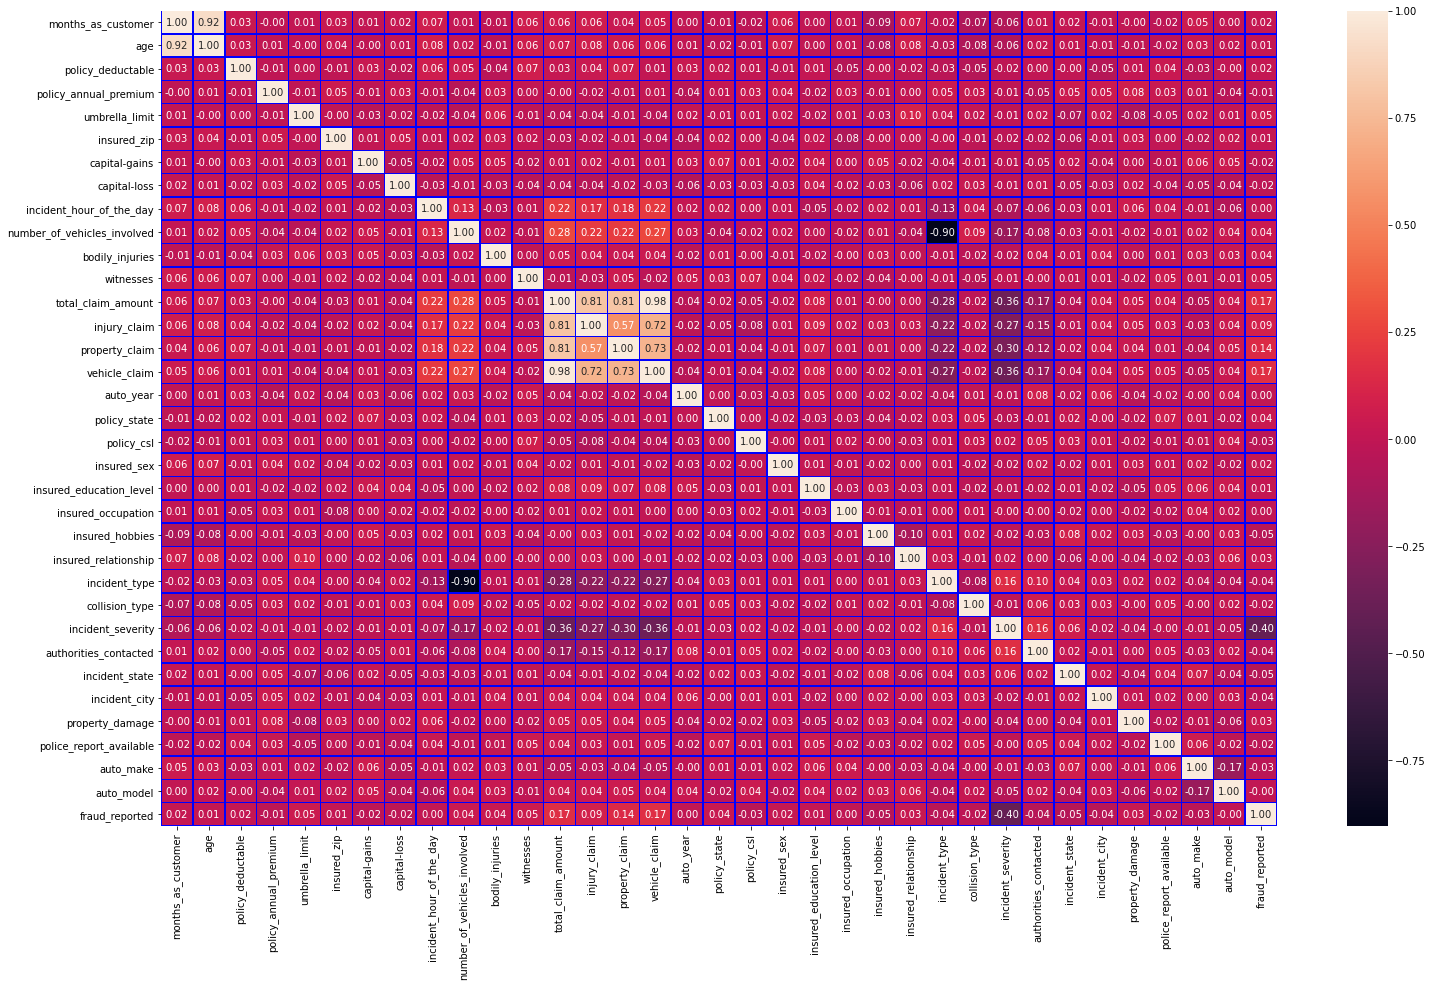

In [53]:
# Visualizing correlation
plt.figure(figsize=(25,15))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

'incident_severity' has good negative linear correlation with target 'fraud_reported' and independent columns 'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim'. 'incident_type' has strong positive correlation with 'number_of_vehicles_involved' and good negative correlation with 'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim'.'total_claim_amount' & 'vehicle_claim' has good correlation with 'incident_hour_of_the_day', 'number_of_vehicles_involved'.'injury_claim' & 'property_claim' has good correlation with 'number_of_vehicles_involved' and strong correlation with 'total_claim_amount' and with each other.'vehicle_claim' has strong correlation with 'total_claim_amount','injury_claim','property_claim'. 'age' is very strongly correlated with months_as_customer.

<AxesSubplot:xlabel='months_as_customer', ylabel='age'>

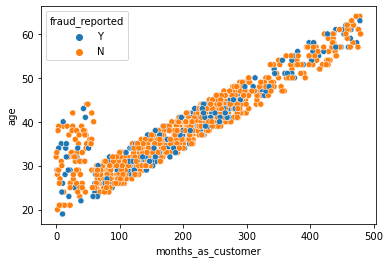

In [54]:
sns.scatterplot(df['months_as_customer'],df['age'],hue=df['fraud_reported'])

months_as_customer & age showing strong positive linear correlation with the each other.

<AxesSubplot:xlabel='property_claim', ylabel='vehicle_claim'>

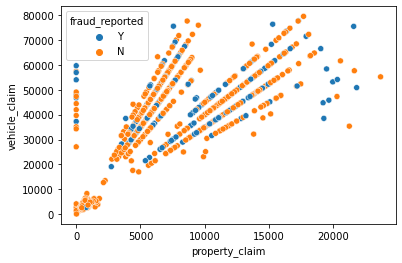

In [55]:
sns.scatterplot(df['property_claim'],df['vehicle_claim'],hue=df['fraud_reported'])

property_claim is highly positively linearly correlated with vehicle_claim.

<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

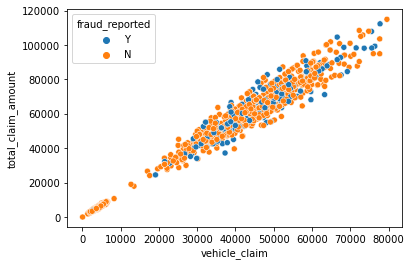

In [56]:
sns.scatterplot(df['vehicle_claim'],df['total_claim_amount'],hue=df['fraud_reported'])

Plot showing high positive correlation between total_claim_amount & vehicle_claim.

<AxesSubplot:xlabel='total_claim_amount', ylabel='injury_claim'>

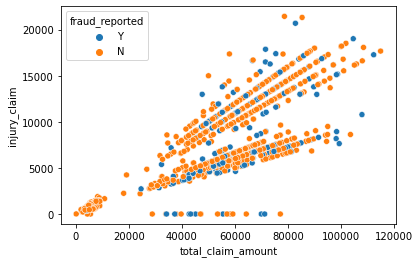

In [57]:
sns.scatterplot(df['total_claim_amount'],df['injury_claim'],hue=df['fraud_reported'])

total_claim_amount and injury_claim showing high positive linear correlation with each other.

<AxesSubplot:xlabel='property_claim', ylabel='injury_claim'>

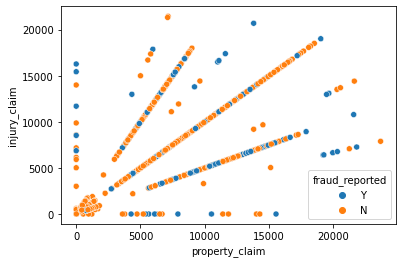

In [58]:
sns.scatterplot(df['property_claim'],df['injury_claim'],hue=df['fraud_reported'])

property_claim & injury_claim showing good correlation.

<AxesSubplot:xlabel='vehicle_claim', ylabel='injury_claim'>

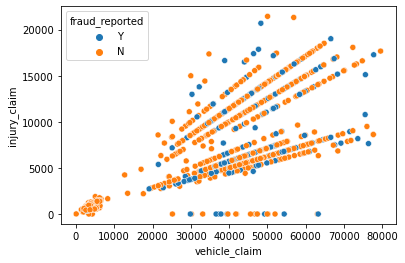

In [59]:
sns.scatterplot(df['vehicle_claim'],df['injury_claim'],hue=df['fraud_reported'])

### Dividing dataset in x and y

In [60]:
x=dff.drop('fraud_reported',axis=1)
x

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,328.0,48.0,1000.0,1406.91,0.000000,13.052226,53300.0,0.0,5.0,1.098612,...,2,2,0,4,4,1,1,1,10,1
1,228.0,42.0,2000.0,1197.22,15.424949,13.056602,0.0,0.0,8.0,1.098612,...,3,1,1,4,5,5,0,0,8,12
2,134.0,29.0,2000.0,1413.14,15.424949,12.973011,35100.0,0.0,7.0,1.609438,...,0,1,1,4,1,1,0,0,4,30
3,256.0,41.0,2000.0,1415.74,15.607270,13.318124,48900.0,-62400.0,5.0,1.098612,...,2,0,0,4,2,0,0,0,3,34
4,228.0,44.0,1000.0,1583.91,15.607270,13.322373,66000.0,-46000.0,20.0,1.098612,...,3,1,1,2,1,0,0,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,38.0,1000.0,1310.80,0.000000,12.974536,0.0,0.0,20.0,1.098612,...,2,0,1,1,0,4,1,0,6,6
996,285.0,41.0,1000.0,1436.79,0.000000,13.318223,70900.0,0.0,23.0,1.098612,...,2,1,0,1,4,3,1,0,13,28
997,130.0,34.0,500.0,1383.49,14.914123,13.000869,35100.0,0.0,4.0,1.609438,...,0,2,1,4,0,0,0,1,11,19
998,458.0,62.0,2000.0,1356.92,15.424949,12.998420,0.0,0.0,2.0,1.098612,...,2,1,0,3,1,0,0,1,1,5


In [61]:
y=dff['fraud_reported']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 979, dtype: int32

In [62]:
# Checking shapes of x and y 
print('Shape of x : ',x.shape)
print('Shape of y : ',y.shape)

Shape of x :  (979, 34)
Shape of y :  (979,)


### Multicollinearity with VIF

In [63]:
# Imporing required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,months_as_customer,28.573249
1,age,131.529002
2,policy_deductable,4.647057
3,policy_annual_premium,29.071399
4,umbrella_limit,1.281856
5,insured_zip,8696.628017
6,capital-gains,1.882821
7,capital-loss,1.985900
8,incident_hour_of_the_day,4.164755
9,number_of_vehicles_involved,152.656434


In [65]:
# Drop high Multicollinear column
x1=x.drop('vehicle_claim',axis=1)
calc_vif(x1)

,Variables,VIF Factors
0,months_as_customer,28.573249
1,age,131.529002
2,policy_deductable,4.647057
3,policy_annual_premium,29.071399
4,umbrella_limit,1.281856
5,insured_zip,8696.628017
6,capital-gains,1.882821
7,capital-loss,1.985900
8,incident_hour_of_the_day,4.164755
9,number_of_vehicles_involved,152.656434


In [66]:
# Drop high Multicollinear column
x1=x1.drop('auto_year',axis=1)
calc_vif(x1)

,Variables,VIF Factors
0,months_as_customer,28.494086
1,age,131.208757
2,policy_deductable,4.639538
3,policy_annual_premium,29.067832
4,umbrella_limit,1.281614
5,insured_zip,322.674116
6,capital-gains,1.882764
7,capital-loss,1.979214
8,incident_hour_of_the_day,4.164695
9,number_of_vehicles_involved,151.496695


In dataset, among multicolnear columns the features that are contributing less to the output variable can be dropped. We can drop 1-2 columns showing high colinearity but not all as it impacts the output.

Machine learning needs refined dataset. It needs only those columns that are highly contributing to the output. Clean data for which EDA is used. This is for better learning and prediction of data by models.

Once refining is done we'll do Standard Scaler to make all data scaled to mean=0 and std.dev.=+-1, so that prediction could be nearby.

### Scaling : Standard Scaler / Min-Max Scaler

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xs=sc.fit_transform(x1)
x2=pd.DataFrame(xs,columns=x1.columns)
x2

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,1.069984,0.983241,-0.225719,0.620095,-0.484220,-0.457645,1.002832,0.956366,-0.959968,-0.829375,...,0.762130,1.347205,-1.261614,1.197612,0.349760,-0.975829,1.515354,1.472510,0.850961,-1.639306
1,0.203374,0.329897,1.411160,-0.247991,2.062164,-0.425388,-0.907071,0.956366,-0.529324,-0.829375,...,1.687844,-0.028096,-0.196855,1.197612,0.813737,0.989884,-0.659912,-0.679113,0.354335,-0.650968
2,-0.611238,-1.085680,1.411160,0.645886,2.062164,-1.041645,0.350670,0.956366,-0.672872,1.168178,...,-1.089298,-0.028096,-0.196855,1.197612,-1.042172,-0.975829,-0.659912,-0.679113,-0.638918,0.966311
3,0.446025,0.221007,1.411160,0.656650,2.092262,1.502650,0.845167,-1.277087,-0.959968,-0.829375,...,0.762130,-1.403397,-1.261614,1.197612,-0.578194,-1.467257,-0.659912,-0.679113,-0.887232,1.325707
4,0.203374,0.547679,-0.225719,1.352849,2.092262,1.533970,1.457913,-0.690090,1.193252,-0.829375,...,1.687844,-0.028096,-0.196855,-0.108025,-1.042172,-1.467257,-0.659912,-0.679113,-1.632171,1.056160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,-1.746497,-0.105665,-0.225719,0.222213,-0.484220,-1.030406,-0.907071,0.956366,1.193252,-0.829375,...,0.762130,-1.403397,-0.196855,-0.760844,-1.506149,0.498456,1.515354,-0.679113,-0.142292,-1.190061
975,0.697342,0.221007,-0.225719,0.743793,-0.484220,1.503377,1.633495,0.956366,1.623896,-0.829375,...,0.762130,-0.028096,-1.261614,-0.760844,0.349760,0.007028,1.515354,-0.679113,1.595901,0.786613
976,-0.645903,-0.541227,-1.044158,0.523139,1.977836,-0.836270,0.350670,0.956366,-1.103516,1.168178,...,-1.089298,1.347205,-0.196855,1.197612,-1.506149,-1.467257,-0.659912,1.472510,1.099274,-0.022026
977,2.196576,2.507709,1.411160,0.413143,2.062164,-0.854323,-0.907071,0.956366,-1.390612,-0.829375,...,0.762130,-0.028096,-1.261614,0.544794,-1.042172,-1.467257,-0.659912,1.472510,-1.383858,-1.279910


### Find best random state for Train-Test Split

In [68]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=i)
    
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    predtrain=dtc.predict(x_train)
    predtest=dtc.predict(x_test)
    acctrain=accuracy_score(y_train,predtrain)
    acctest=accuracy_score(y_test,predtest)
    #if round(acctrain,1)==round(acctest,1) :
    #    print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Final Best random state : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Final Best random state :  42  Accuracy(Training) :  100.0  Accuracy(Testing) :  82.6530612244898


Here, training & testing accuracies are almost same for random state=42. So, lets take 42 as our best random state.

In [70]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(783, 32)
(196, 32)
(783,)
(196,)


In [71]:
y_train.value_counts()

0    588
1    195
Name: fraud_reported, dtype: int64

Huge difference is there in both classes of training set hence balancing the class now.

### Class Imbalance

In [72]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
trainx,trainy=sm.fit_resample(x_train,y_train)

Resampling is done on training dataset as samplng on whole dataset will create unnecessary testing and validation sets which will give misleading results.

In [73]:
trainy.value_counts()

0    588
1    588
Name: fraud_reported, dtype: int64

### Finding the best algorithm

In [74]:
# Making instance of classifiers
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
xg=GradientBoostingClassifier()

In [75]:
#Executing all algorithms in a single for loop

algo_list=[lr,dtc,rf,xg]
for i in algo_list :
    print(i)
    i.fit(trainx,trainy)
    predtrain=i.predict(trainx)
    predtest=i.predict(x_test)
    acctrain=accuracy_score(trainy,predtrain)
    acctest=accuracy_score(y_test,predtest)
    err=mean_absolute_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100,' Mean absolute error : ',err)
    print(confusion_matrix(y_test,predtest))
    print(classification_report(y_test,predtest))
    print('\n')

LogisticRegression()
Accuracy(Training) :  76.53061224489795  Accuracy(Test)  72.44897959183673  Mean absolute error :  0.2755102040816326
[[110  41]
 [ 13  32]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       151
           1       0.44      0.71      0.54        45

    accuracy                           0.72       196
   macro avg       0.67      0.72      0.67       196
weighted avg       0.79      0.72      0.74       196



DecisionTreeClassifier()
Accuracy(Training) :  100.0  Accuracy(Test)  81.63265306122449  Mean absolute error :  0.1836734693877551
[[134  17]
 [ 19  26]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       151
           1       0.60      0.58      0.59        45

    accuracy                           0.82       196
   macro avg       0.74      0.73      0.74       196
weighted avg       0.81      0.82      0.81       196



RandomForestClassifier()
A

GradientBoostingClassifier has the highest accuracy but let's go for cross validation for all the models used.

In [77]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',cross_val_score(i,x2,y,cv=5).mean())

CV mean of  LogisticRegression()  is  0.7722344322344322
CV mean of  DecisionTreeClassifier()  is  0.755913134484563
CV mean of  RandomForestClassifier()  is  0.7783621140763997
CV mean of  GradientBoostingClassifier()  is  0.8294348508634222


Looking at difference of accuracy and cv mean, opting for GradientBoostingClassifier as our best model with accuracy of 85% and having least difference between accuracy and cv mean.

### Hyperparameter Tuning

In [78]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'loss':['deviance','exponential'],
              'criterion':['friedman_mse','squared_error','mse','mae'],
              'max_features':['auto','sqrt','log2'],
              'min_samples_leaf':[1]}
              #'verbose':[0,1,2,3,4,5],
              #'n_estimators':[10,50,100]}

xg=GradientBoostingClassifier()
GCV=GridSearchCV(xg,parameters,cv=5)
GCV.fit(trainx,trainy)
GCV.best_params_

{'criterion': 'friedman_mse',
 'loss': 'exponential',
 'max_features': 'auto',
 'min_samples_leaf': 1}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [84]:
xg=GradientBoostingClassifier(criterion='friedman_mse',loss='exponential',max_features='auto',min_samples_leaf=1)
xg.fit(trainx,trainy)
pred=xg.predict(x_test)
acc=accuracy_score(y_test,pred)
cv=cross_val_score(xg,x2,y,cv=4).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.8622448979591837  CV mean :  0.8294329207092674


#### We are getting model accuracy as approx 86% and cv mean as 0.83, this shows our model is performing good.

### AUC-ROC Curve

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

xg=GradientBoostingClassifier(criterion='friedman_mse',loss='exponential',max_features='auto',min_samples_leaf=1)
xg.fit(trainx,trainy)
pred=xg.predict(x_test)
acc1=accuracy_score(y_test,pred)

Applying AUC-ROC curve on selected model i.e. GradientBoostingClassifier()

In [86]:
pred_proba=xg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_proba)
#print(fpr,tpr,thresholds)

Calculating fpr,tpr,thresholds for selected model

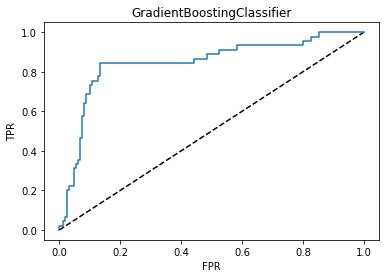

In [87]:
# Plotting the curve

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GradientBoostingClassifier')
plt.show()

In [88]:
auc_score=roc_auc_score(y_test,pred_proba)
print('Accuracy : ',acc1)
print('ROC_AUC score : ',auc_score)

Accuracy :  0.8622448979591837
ROC_AUC score :  0.8450331125827814


Getting good accuracy score and AUC-ROC score for the model selected

### Saving the model

In [89]:
# Saved the model in .pkl file
import pickle #import joblib
file='insurance.pkl'
pickle.dump(xg,open(file,'wb'))

### Conclusion

In [90]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.8622448979591837

In [91]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(196, 32)
(196,)


In [92]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(xg.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted})
conclusion[10:40]

,Orignal,Predicted
10,0,0
11,0,0
12,0,1
13,1,1
14,1,1
15,0,0
16,0,0
17,0,0
18,0,0
19,0,0
